In [6]:
from kimtransit import *

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [5]:
x = np.linspace(0,100,100)

def KimTransit(x, baseline_y, starttime, stoptime, r_planet, r_star):
    
    percent_darkened = np.pi * r_planet**2 / np.pi * r_star**2 
    return percent_darkened

# generating some fake variable data for us to fit

In [235]:
def Sin(t, amp = 1.0, offset = 0.0, period = 1.0, phase = 0.0):
    y = np.sin(2*np.pi/period * (t-phase))
    return amp/2 * y + offset

def add_noise(x, amp=0.1):
    return np.asarray([i + (amp*(np.random.random()-0.5)) for i in x])

In [236]:
t = add_noise(np.arange(0,20,0.15))
mag = Sin(t, amp=0.85, period=0.13, phase=0.45)
err = np.zeros(len(t)) + 0.05

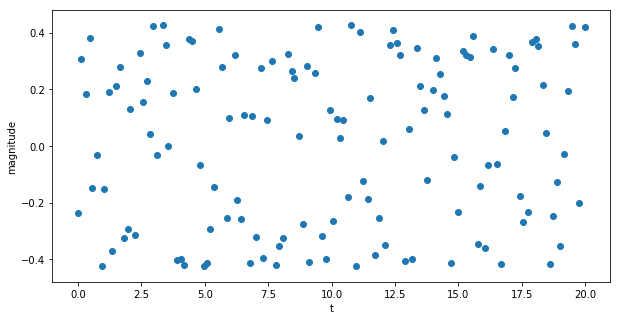

In [237]:
plt.figure(figsize=(10,5))
plt.scatter(t, mag)
plt.xlabel('t')
plt.ylabel('magnitude');

# finding a estimate period

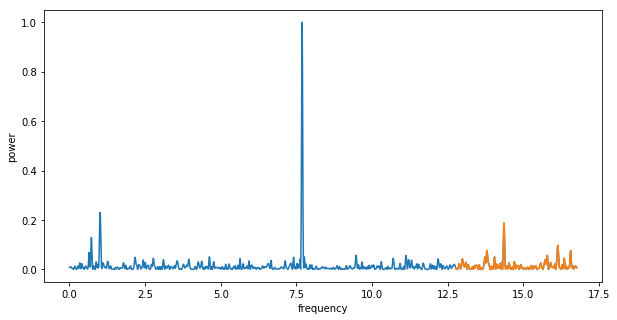

In [315]:
from astropy.stats import LombScargle

frequency, power = LombScargle(t, mag).autopower()

plt.figure(figsize=(10,5))
plt.plot(frequency, power)

plt.plot(frequency[-400:], power[-400:])

plt.xlabel('frequency')
plt.ylabel('power');

In [320]:
period = 1./frequency[-400:][np.argmax(power[-400:])]
print(period)

period = 1./frequency[:400][np.argmax(power[:400])]
print(period)

0.06963659638150403
0.984174359697217


In [239]:
period = 1./frequency[np.argmax(power)]

print ("guess period (1/frequency @ max of power spectrum):", period)

guess period (1/frequency @ max of power spectrum): 0.1299852927901985


# Fitting a function using scipy.optimization.curve_fit

First, we define a guess values for each of our model parameters in our function.

In [300]:
# amp = 1.0, offset = 0.0, period = 1.0, phase = 0.0
guess_parameter_values = np.array([1, 0, 0.13, 0])

# guess_parameter_values = np.array([0.1, 0, 0.1305, 0])

Here, ```curve_fit``` takes in a function, the x values, the y values, and the guess parameters values.

In return, we are given parameter values and a covarience matrix. The estimated errors on our parameters are found by taking the square root of the diagonals of your covarience matrix.

Note, here we have given ```curve_fit``` fake y errors, which is really important to include when you work with your data.

In [301]:
0.1**2 * np.sqrt(len(t))

0.11575836902790228

In [302]:
# curve_fit?

In [303]:
from scipy.optimize import curve_fit

fit = curve_fit(Sin, t, mag, guess_parameter_values, sigma=0.1*np.ones_like(t),
                absolute_sigma=True)

params, cov = fit
param_errs = np.sqrt(np.diagonal(cov))

In [304]:
cov

array([[ 6.52059373e-04,  6.59909153e-06,  5.17051030e-09,
         4.34240275e-07],
       [ 6.59909153e-06,  2.21333341e-05,  1.49143509e-09,
         2.64923134e-09],
       [ 5.17051030e-09,  1.49143509e-09,  1.61705721e-10,
        -1.24189151e-08],
       [ 4.34240275e-07,  2.64923134e-09, -1.24189151e-08,
         1.28328121e-06]])

In [305]:
params

array([-8.50000000e-01,  1.22217563e-10,  1.30000000e-01, -5.00000000e-03])

In [306]:
amp, offset, period, phase = params
amp_err, offset_err, period_err, phase_err = param_errs

print ("amp :", amp, "\noffset :", offset, "\nperiod :", period, "\nphase :", phase)

amp : -0.8499999999852689 
offset : 1.222175634516202e-10 
period : 0.13000000000000378 
phase : -0.005000000000832796


# How'd we do?

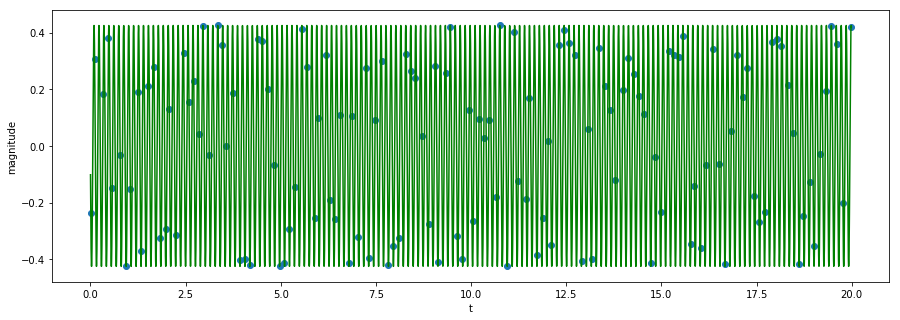

In [307]:
t_toplot = np.linspace(0, max(t), 10000)

plt.figure(figsize=(15,5))
plt.scatter(t, mag)
plt.plot(t_toplot, Sin(t_toplot, amp, offset, period, phase), 'g-')
plt.xlabel('t')
plt.ylabel('magnitude');

# covarience matrix

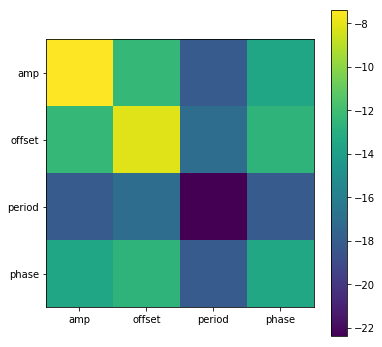

In [190]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

im = ax.imshow(np.log(np.abs(cov)))
fig.colorbar(im)

ax.set_yticklabels(['amp','offset','period','phase'])
ax.set_yticks([0,1,2,3])

ax.set_xticklabels(['amp','offset','period','phase'])
ax.set_xticks([0,1,2,3]);

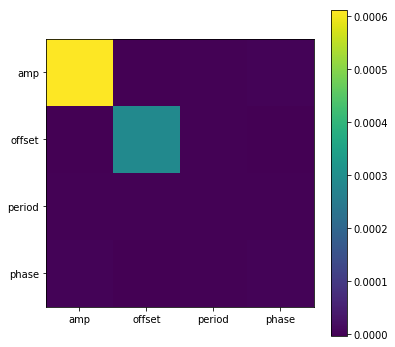

In [191]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

im = ax.imshow(cov)
fig.colorbar(im)

ax.set_yticklabels(['amp','offset','period','phase'])
ax.set_yticks([0,1,2,3])

ax.set_xticklabels(['amp','offset','period','phase'])
ax.set_xticks([0,1,2,3]);

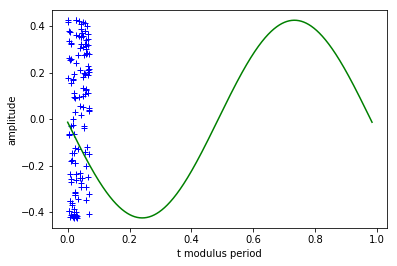

In [324]:
plt.figure(figsize=(6,4))

mod_period = 0.984174359697217
mod_period = 0.06963659638150403

# mod_period = period
plt.plot((t % mod_period), mag, 'b+')

t_toplot_modT = plt.linspace(0, period, 1000)
plt.plot(t_toplot_modT, Sin(t_toplot_modT, amp, offset, period, phase), 'g-' )

plt.ylabel('amplitude')
plt.xlabel('t modulus period');

# Note, your function matters.

In [194]:
def line(x, m, b):
    return m*x + b

guess_parameter_values = [1,0]
fit = curve_fit(line, t, mag, guess_parameter_values)
params, cov = fit

In [195]:
params

array([-0.00200027, -0.00100463])

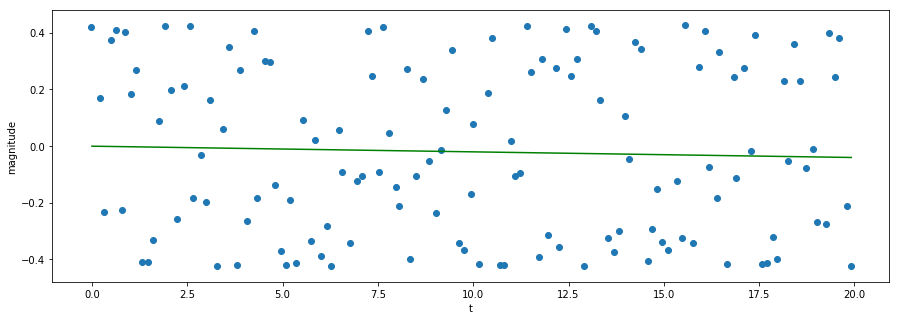

In [196]:
plt.figure(figsize=(15,5))
plt.scatter(t, mag)

m, b = params
plt.plot(t_toplot, line(t_toplot, m, b), 'g-')
plt.xlabel('t')
plt.ylabel('magnitude');